# Goal

The goal of this project is to predict whether insurance policies are claimed based on some of features. Before doing data analysis, we will introduce travel insurance policy first. Usually, travel insurance will have coverage for travelers concerns, including flight delays, trip cancellation, or loggage loss. And, some of policies include medical emergency. It means that the insured's age might have an influence on whether the policy is claimed.

# problem statement

Insurance companies take risks over customers. Risk management is a very important aspect of the insurance industry. Insurers consider every quantifiable factor to develop profiles of high and low insurance risks. Insurers collect vast amounts of information about policyholders and analyze the data.

As a Data scientist in an insurance company, you need to analyze the available data and predict whether to sanction the insurance or not.

In [1]:
import sys
import scipy
import numpy
import matplotlib
import pandas
import sklearn
# Python Version
print('Python {0}'.format(sys.version))
# scipy
print('scipy {0}'.format(scipy.__version__))
# numpy
print('numpy {0}'.format(numpy.__version__))
# matplotlib
print('matplotlib {0}'.format(matplotlib.__version__))
# pandas
print('pandas {0}'.format(pandas.__version__))
# sklearn
print('sklearn {0}'.format(sklearn.__version__))

Python 3.7.6 (default, Jan  8 2020, 20:23:39) [MSC v.1916 64 bit (AMD64)]
scipy 1.1.0
numpy 1.18.1
matplotlib 3.1.3
pandas 1.0.1
sklearn 0.19.2


In [2]:
import pandas as pd
import numpy as np
import missingno
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
import seaborn as sns

# Comment this if the data visualisations doesn't work on your side
%matplotlib inline
# This is to supress the warning messages (if any) generated in our code
import warnings
warnings.filterwarnings('ignore')
# We are using whitegrid style for our seaborn plots. This is like the most basic one
sns.set_style(style = 'whitegrid')

In [3]:
df = pd.read_csv('insu_train.csv')

In [4]:
df.head()

,ID,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age,Claim
0,2010,EPX,Travel Agency,Online,Cancellation Plan,61,PHILIPPINES,12.0,0.00,41,0
1,4245,EPX,Travel Agency,Online,Cancellation Plan,4,MALAYSIA,17.0,0.00,35,0
2,9251,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,26,THAILAND,19.8,11.88,47,0
3,4754,EPX,Travel Agency,Online,2 way Comprehensive Plan,15,HONG KONG,27.0,0.00,48,0
4,8840,EPX,Travel Agency,Online,2 way Comprehensive Plan,15,MALAYSIA,37.0,0.00,36,0


In [5]:
df.shape

(52310, 11)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52310 entries, 0 to 52309
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    52310 non-null  int64  
 1   Agency                52310 non-null  object 
 2   Agency Type           52310 non-null  object 
 3   Distribution Channel  52310 non-null  object 
 4   Product Name          52310 non-null  object 
 5   Duration              52310 non-null  int64  
 6   Destination           52310 non-null  object 
 7   Net Sales             52310 non-null  float64
 8   Commision (in value)  52310 non-null  float64
 9   Age                   52310 non-null  int64  
 10  Claim                 52310 non-null  int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 4.4+ MB


In [7]:
#assign to category to save memory usage from 4.4+mb to 2.2+mb
categorical_col = ['Agency', 'Agency Type', 'Distribution Channel', 'Product Name', 'Destination']
# remove 'id' column from the dataset
df.drop('ID',axis=1,inplace=True)

df[categorical_col] = df[categorical_col].astype('category') 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52310 entries, 0 to 52309
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Agency                52310 non-null  category
 1   Agency Type           52310 non-null  category
 2   Distribution Channel  52310 non-null  category
 3   Product Name          52310 non-null  category
 4   Duration              52310 non-null  int64   
 5   Destination           52310 non-null  category
 6   Net Sales             52310 non-null  float64 
 7   Commision (in value)  52310 non-null  float64 
 8   Age                   52310 non-null  int64   
 9   Claim                 52310 non-null  int64   
dtypes: category(5), float64(2), int64(3)
memory usage: 2.2 MB


In [8]:
#look unique value for each columns
for col in categorical_col:
    uniq = len(df[col].unique())
    print(f'{col} :{uniq} Categories')

Agency :16 Categories
Agency Type :2 Categories
Distribution Channel :2 Categories
Product Name :25 Categories
Destination :97 Categories


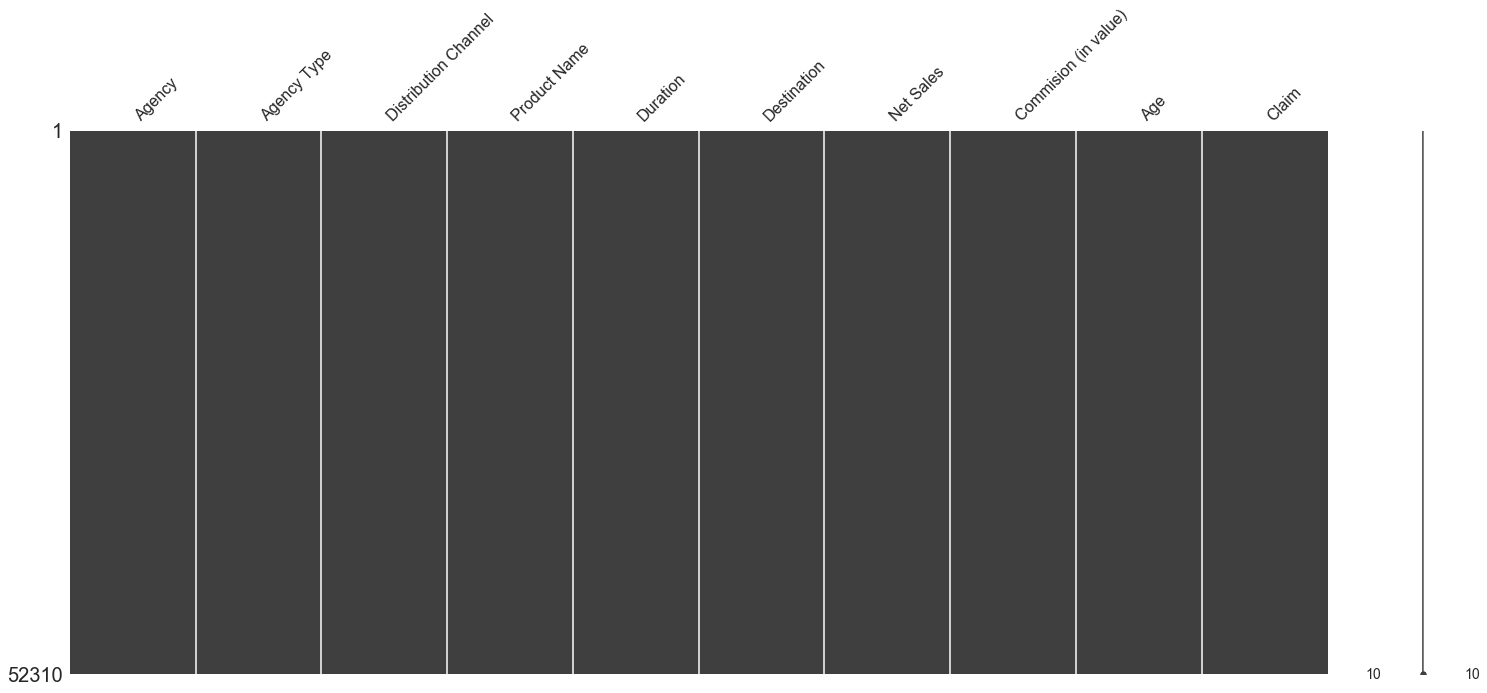

In [9]:
missingno.matrix(df)

In [10]:
df.describe()

,Duration,Net Sales,Commision (in value),Age,Claim
count,52310.000000,52310.000000,52310.000000,52310.000000,52310.000000
mean,58.256108,48.554673,12.219963,39.555725,0.166699
std,109.138708,60.198589,22.847645,13.762473,0.372710
min,-2.000000,-389.000000,0.000000,0.000000,0.000000
25%,10.000000,19.800000,0.000000,33.000000,0.000000
50%,24.000000,29.500000,0.000000,36.000000,0.000000
75%,57.000000,55.000000,13.380000,43.000000,0.000000
max,4881.000000,682.000000,262.760000,118.000000,1.000000


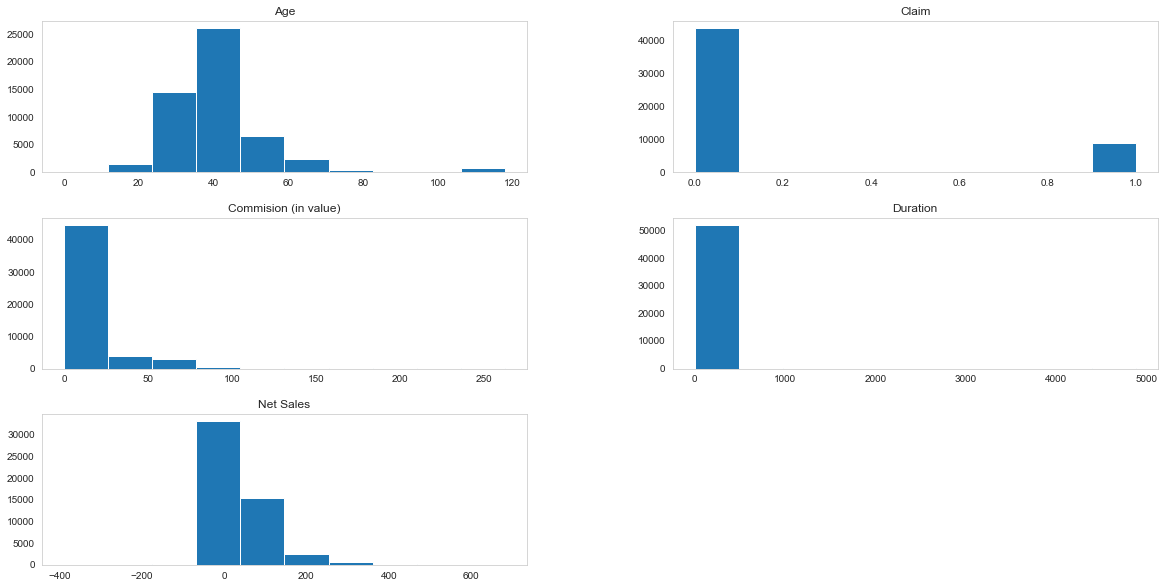

In [11]:
df.hist(figsize=(20,10), grid = False, layout=(3,2), bins = 10);

In [12]:
df_dur = df['Duration'] < 0
df_dur.sum()

4

In [13]:
df[df["Duration"] <0]

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age,Claim
11523,JZI,Airlines,Online,Basic Plan,-1,INDONESIA,18.0,6.3,118,0
15949,JZI,Airlines,Online,Basic Plan,-1,BRUNEI DARUSSALAM,18.0,6.3,118,0
33398,JZI,Airlines,Online,Basic Plan,-1,MALAYSIA,18.0,6.3,118,0
41424,JZI,Airlines,Online,Basic Plan,-2,BANGLADESH,22.0,7.7,118,0


In [14]:
df.loc[df['Duration'] < 0, 'Duration'] = 58.256

In [15]:
df[df["Age"] >100]

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age,Claim
46,JWT,Airlines,Online,Value Plan,49.0,INDIA,31.0,12.40,118,0
88,JWT,Airlines,Online,Value Plan,22.0,INDIA,50.0,20.00,118,0
109,JWT,Airlines,Online,Value Plan,46.0,INDIA,31.0,12.40,118,0
132,JWT,Airlines,Online,Value Plan,89.0,INDIA,117.0,46.80,118,0
156,JWT,Airlines,Online,Value Plan,68.0,INDIA,180.0,72.00,118,0
...,...,...,...,...,...,...,...,...,...,...
52049,JWT,Airlines,Online,Value Plan,3.0,INDIA,31.0,12.40,118,0
52078,JWT,Airlines,Online,Value Plan,4.0,INDIA,31.0,12.40,118,0
52208,JWT,Airlines,Online,Value Plan,9.0,INDIA,31.0,12.40,118,0
52213,JZI,Airlines,Online,Value Plan,70.0,UNITED STATES,0.0,25.55,118,0


In [16]:
df.loc[df['Age'] > 100, 'Age'] = 39.555

In [17]:
df.describe()

,Duration,Net Sales,Commision (in value),Age,Claim
count,52310.000000,52310.000000,52310.000000,52310.000000,52310.000000
mean,58.260658,48.554673,12.219963,38.451712,0.166699
std,109.137468,60.198589,22.847645,10.082680,0.372710
min,0.000000,-389.000000,0.000000,0.000000,0.000000
25%,10.000000,19.800000,0.000000,33.000000,0.000000
50%,24.000000,29.500000,0.000000,36.000000,0.000000
75%,57.000000,55.000000,13.380000,42.000000,0.000000
max,4881.000000,682.000000,262.760000,97.000000,1.000000


In [18]:
df_numerical=df._get_numeric_data()
df_numerical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52310 entries, 0 to 52309
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Duration              52310 non-null  float64
 1   Net Sales             52310 non-null  float64
 2   Commision (in value)  52310 non-null  float64
 3   Age                   52310 non-null  float64
 4   Claim                 52310 non-null  int64  
dtypes: float64(4), int64(1)
memory usage: 2.0 MB


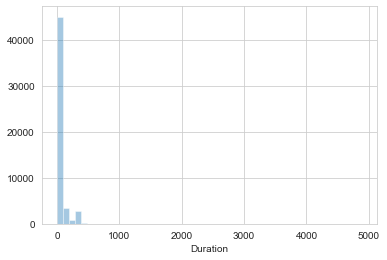

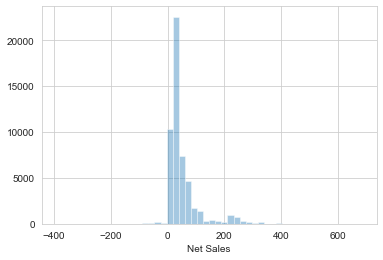

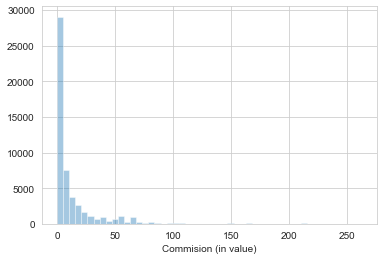

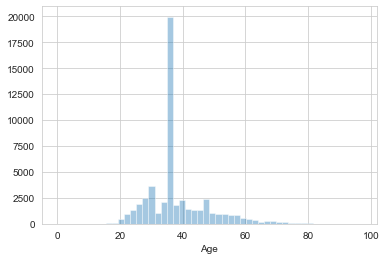

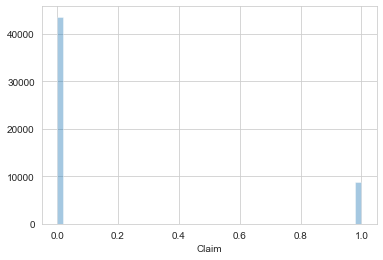

In [19]:
for i, col in enumerate(df_numerical.columns):
    plt.figure(i)
    sns.distplot(df_numerical[col],kde=False)

In [20]:
df6= df['Net Sales']<df['Commision (in value)']
df6.sum()

1454

In [21]:
df.loc[df['Net Sales'] == 0.0, 'Commision (in value)'] = 0

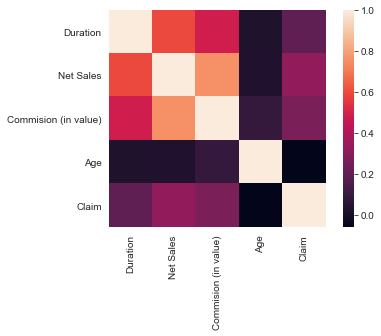

In [22]:
sns.heatmap(df.corr(), square=True)

In [23]:
df.corr()

,Duration,Net Sales,Commision (in value),Age,Claim
Duration,1.000000,0.595248,0.485465,0.024094,0.201567
Net Sales,0.595248,1.000000,0.759139,0.029318,0.326799
Commision (in value),0.485465,0.759139,1.000000,0.087565,0.271470
Age,0.024094,0.029318,0.087565,1.000000,-0.060449
Claim,0.201567,0.326799,0.271470,-0.060449,1.000000


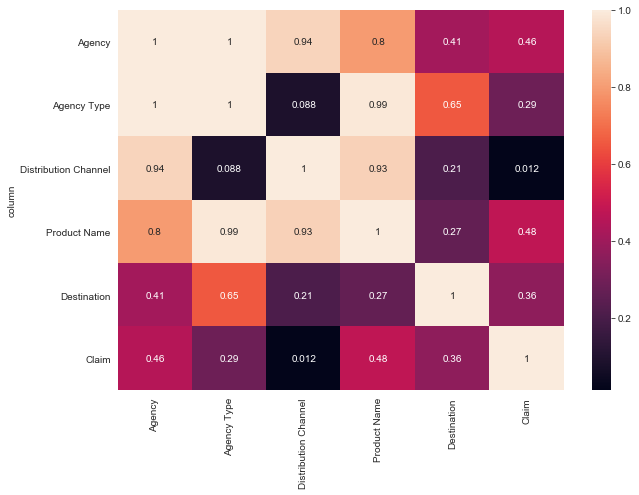

In [24]:
import scipy.stats as ss
import numpy as np

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

categorical=['Agency', 'Agency Type', 'Distribution Channel', 'Product Name',  'Destination','Claim']
cramers=pd.DataFrame({i:[cramers_v(df[i],df[j]) for j in categorical] for i in categorical})
cramers['column']=[i for i in categorical if i not in ['memberid']]

cramers.set_index('column',inplace=True)

#categorical correlation heatmap

plt.figure(figsize=(10,7))
sns.heatmap(cramers,annot=True)
plt.show()

In [25]:
pd.crosstab(df['Agency'],df['Agency Type'],margins=True)

Agency Type,Airlines,Travel Agency,All
Agency,,,
ADM,0,56,56
ART,223,0,223
C2B,10615,0,10615
CBH,0,76,76
CCR,0,156,156
CSR,0,60,60
CWT,0,6813,6813
EPX,0,26218,26218
JWT,550,0,550


In [26]:
table1=pd.crosstab(df['Agency'],df['Claim'],margins=True)

table1.drop(index=['All'],inplace=True)
table1=(table1.div(table1['All'],axis=0))*100

table1['mean commision']=df.groupby('Agency')['Commision (in value)'].mean()
table1

Claim,0,1,All,mean commision
Agency,,,,
ADM,100.000000,0.000000,100.0,32.191429
ART,100.000000,0.000000,100.0,10.002332
C2B,51.229392,48.770608,100.0,23.819931
CBH,98.684211,1.315789,100.0,9.270395
CCR,93.589744,6.410256,100.0,10.376370
CSR,98.333333,1.666667,100.0,10.686500
CWT,87.553207,12.446793,100.0,30.416720
EPX,92.829354,7.170646,100.0,0.016009
JWT,94.363636,5.636364,100.0,21.854913


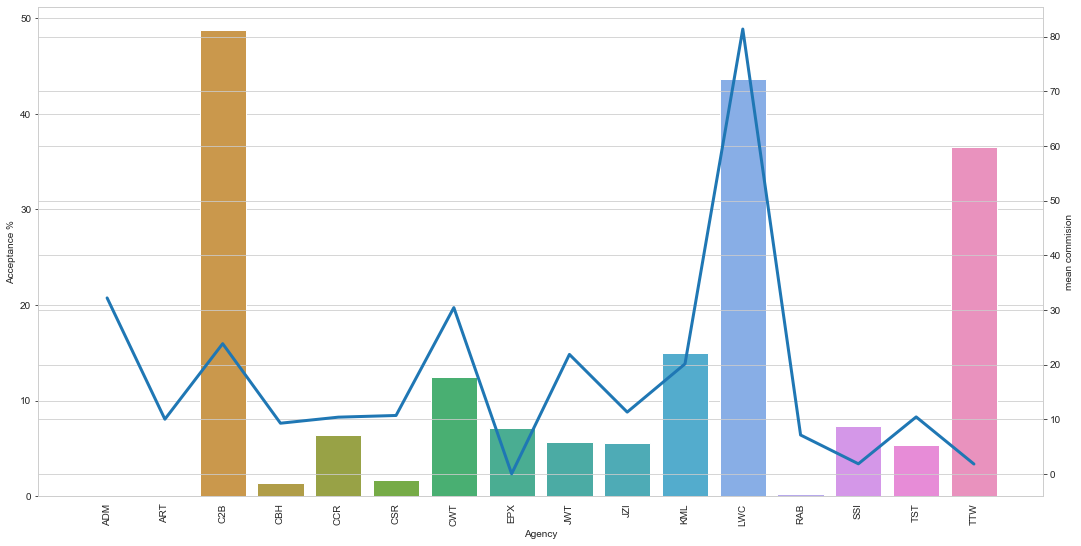

In [27]:
fig,ax1=plt.subplots(figsize=(18,9))
sns.barplot(table1.index,table1[1],ax=ax1)
plt.xticks(rotation=90)
ax1.set(ylabel='Acceptance %')
ax2=ax1.twinx()
sns.lineplot(table1.index,table1['mean commision'],ax=ax2,linewidth=3)

X axis= Agency Name Y axis=Acceptance % line plot= Commision So we can see certain agencies have higher % of acceptance, C2B, LWC, TTW

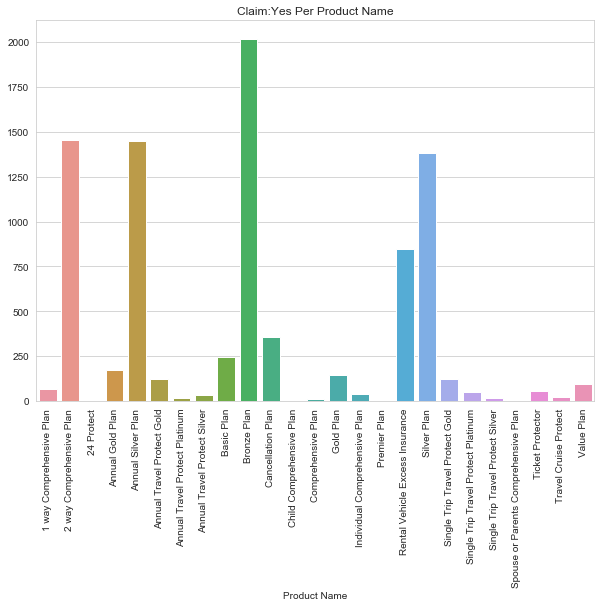

In [28]:
product_claim = pd.crosstab(df['Product Name'],df['Claim'],margins=True)
product_claim.drop(index=['All'],inplace=True)

plt.figure(figsize=(10, 7))
sns.barplot(product_claim.index, product_claim[1].values)
plt.xticks(rotation=90)
plt.title("Claim:Yes Per Product Name")
plt.show()

Some of the products with high commission have a high ratio of claims acceptance. The plans with zero commission generally have low acceptance

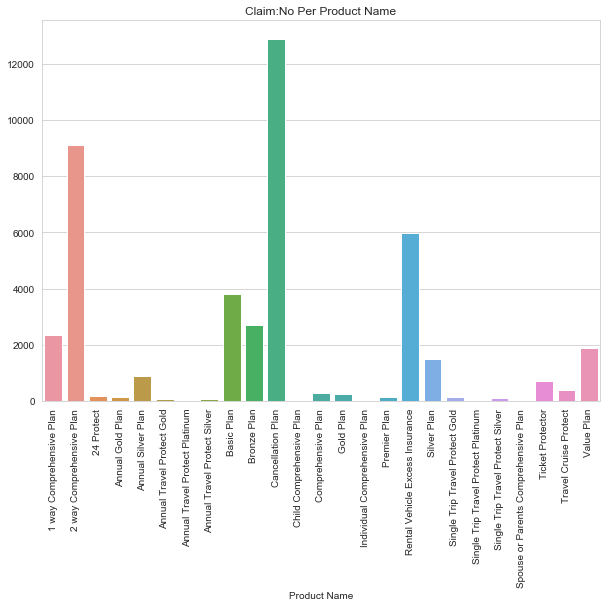

In [29]:
plt.figure(figsize=(10, 7))
sns.barplot(product_claim.index, product_claim[0].values)
plt.xticks(rotation=90)
plt.title("Claim:No Per Product Name")
plt.show()


In [30]:
def class_imbalance(target):
    class_values = (target.value_counts()/target.value_counts().sum())*100
    return class_values

class_imbalance(df['Claim'])

0    83.330147
1    16.669853
Name: Claim, dtype: float64

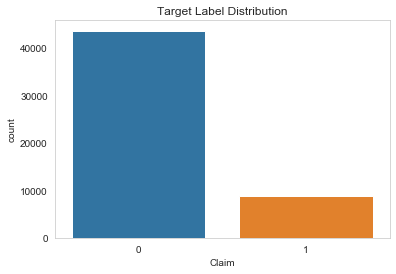

In [31]:
#target columns
sns.countplot(df['Claim'])
plt.title("Target Label Distribution")
plt.grid(axis='y')
plt.show()

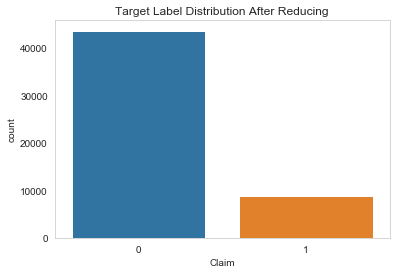

In [32]:
#reducing Target No due to severe imbalance
random_no = df[df['Claim']== 0].sample(frac=1)
n_to_drop = len(random_no) - 10000

clean_reduce = df.drop(axis=0, index=random_no.index[:n_to_drop])

#target columns
sns.countplot(df['Claim'])
plt.title("Target Label Distribution After Reducing")
plt.grid(axis='y')
plt.show()

In [33]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn import tree
from sklearn import preprocessing
#df1.head()

le = preprocessing.LabelEncoder()
df_new = df.apply(le.fit_transform)

X = df_new.values[:, 0:5]
Y = df_new.values[:,6]
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.2, random_state = 100)
clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100,
                               max_depth=3, min_samples_leaf=5)

clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

In [34]:
df_new

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age,Claim
0,7,1,1,10,62,68,472,0,41,0
1,7,1,1,10,4,53,741,0,34,0
2,6,1,1,16,26,84,1013,2148,47,0
3,7,1,1,1,15,33,1915,0,48,0
4,7,1,1,1,15,53,2915,0,35,0
...,...,...,...,...,...,...,...,...,...,...
52305,2,0,1,3,332,75,6679,4968,40,1
52306,12,0,1,24,8,12,1444,1732,54,0
52307,2,0,1,9,38,75,4377,2673,36,0
52308,7,1,1,10,2,84,401,0,46,0


In [35]:
df

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age,Claim
0,EPX,Travel Agency,Online,Cancellation Plan,61.0,PHILIPPINES,12.000000,0.0000,41.0,0
1,EPX,Travel Agency,Online,Cancellation Plan,4.0,MALAYSIA,17.000000,0.0000,35.0,0
2,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,26.0,THAILAND,19.800000,11.8800,47.0,0
3,EPX,Travel Agency,Online,2 way Comprehensive Plan,15.0,HONG KONG,27.000000,0.0000,48.0,0
4,EPX,Travel Agency,Online,2 way Comprehensive Plan,15.0,MALAYSIA,37.000000,0.0000,36.0,0
...,...,...,...,...,...,...,...,...,...,...
52305,C2B,Airlines,Online,Annual Gold Plan,365.0,SINGAPORE,444.750593,111.1858,40.0,1
52306,RAB,Airlines,Online,Value Plan,8.0,BRUNEI DARUSSALAM,23.000000,9.2000,54.0,0
52307,C2B,Airlines,Online,Bronze Plan,38.0,SINGAPORE,61.100000,15.2800,37.0,0
52308,EPX,Travel Agency,Online,Cancellation Plan,2.0,THAILAND,10.000000,0.0000,46.0,0


In [36]:
le = preprocessing.LabelEncoder()
df = df.apply(le.fit_transform)

In [37]:
# save the labels into a variable l.
l = df['Claim']

# Drop the label feature and store the pixel data in d.
d = df.drop("Claim",axis=1)
# Pick first 15K data-points to work on for time-effeciency.
#Excercise: Perform the same analysis on all of 42K data-points.

labels = l.head(10000)
data = d.head(10000)

print("the shape of sample data = ", data.shape)


the shape of sample data =  (10000, 9)


In [38]:
# Data-preprocessing: Standardizing the data

from sklearn.preprocessing import StandardScaler
standardized_data = StandardScaler().fit_transform(data)
print(standardized_data.shape)


(10000, 9)


In [39]:
#find the co-variance matrix which is : A^T * A
sample_data = standardized_data

# matrix multiplication using numpy
covar_matrix = np.matmul(sample_data.T , sample_data)

print ( "The shape of variance matrix = ", covar_matrix.shape)


The shape of variance matrix =  (9, 9)


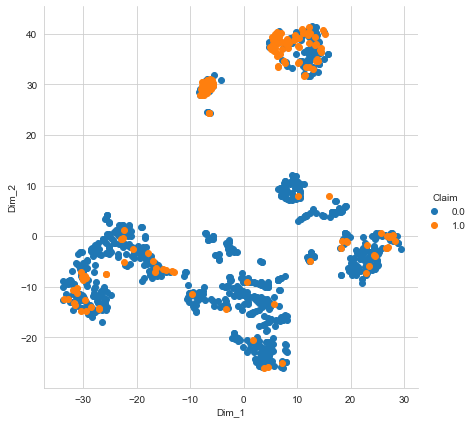

In [40]:
# TSNE

from sklearn.manifold import TSNE

# Picking the top 1000 points as TSNE takes a lot of time for 15K points
data_1000 = standardized_data[0:1000,:]
labels_1000 = labels[0:1000]

model = TSNE(n_components=2, random_state=0, perplexity=50)
# configuring the parameteres
# the number of components = 2
# default perplexity = 30
# default learning rate = 200
# default Maximum number of iterations for the optimization = 1000

tsne_data = model.fit_transform(data_1000)


# creating a new data frame which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T, labels_1000)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "Claim"))

# Ploting the result of tsne
sns.FacetGrid(tsne_df, hue="Claim", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.show()

In [41]:
from sklearn.model_selection import train_test_split
from collections import Counter


#split label and features
#One Hot Encoding for categorical data
X = clean_reduce.drop(columns=['Claim'])
X = pd.get_dummies(X, columns=categorical_col).values
# y = df['Claim'].replace(labels).values
y = clean_reduce['Claim'].values
print(f'Datasets Features Size {X.shape}')

#X, y without Oversampling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)
print('Traininng shape %s' % Counter(y_train))
print('Testing shape %s' % Counter(y_test))


Datasets Features Size (18720, 146)
Traininng shape Counter({0: 8005, 1: 6971})
Testing shape Counter({0: 1995, 1: 1749})


In [42]:
X.shape

(18720, 146)

In [43]:
from imblearn.over_sampling import SMOTE

#with SMOTE
sm = SMOTE(random_state=42)
X_sample, y_sample = sm.fit_sample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_sample))

Resampled dataset shape Counter({1: 8005, 0: 8005})


In [44]:
y_train.sum()

6971

In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier 
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier


def model_check(models, X_train, y_train):
    for name, model in models.items():
        score = cross_val_score(model, X_train, y_train,cv=10, scoring='precision', n_jobs=-1)
        print(f'{name} Precision score : {np.mean(score)}')

models = {'random_forest':RandomForestClassifier(), 
          'logistic_reg':LogisticRegression(), 
          'XGB':XGBClassifier(), 
          'GB':GradientBoostingClassifier()}

print("Without SMOTE")
model_check(models, X_train, y_train)
print()

print("With SMOTE")
model_check(models, X_sample, y_sample)

Without SMOTE
random_forest Precision score : 0.8826142558962786
logistic_reg Precision score : 0.7679812673334596
XGB Precision score : 0.7925295561508129
GB Precision score : 0.7956139105340106

With SMOTE
random_forest Precision score : 0.8974713830560613
logistic_reg Precision score : 0.7775159047617377
XGB Precision score : 0.8016839316327438
GB Precision score : 0.8054591685553907


In [46]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

model = RandomForestClassifier(n_jobs=-1, verbose=1)
param_dist = {'n_estimators':[300, 400, 500, 600], 'max_depth':[5,6,7,8]}

random = RandomizedSearchCV(model, param_dist, random_state=0, scoring='average_precision', n_jobs=-1, cv=3, verbose=1)
search = random.fit(X_sample, y_sample)
print('BEST PARAM', search.best_params_)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  1.5min finished
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:    4.6s


BEST PARAM {'n_estimators': 500, 'max_depth': 8}


[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    5.2s finished


In [49]:
pd.DataFrame(search.cv_results_).sort_values(by='rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
7,43.025660,1.005852,3.826654,0.271159,500,8,"{'n_estimators': 500, 'max_depth': 8}",0.847585,0.863130,0.863803,0.858173,0.007491,1
4,34.872252,0.391890,3.488433,0.736943,400,8,"{'n_estimators': 400, 'max_depth': 8}",0.847019,0.862992,0.863505,0.857839,0.007654,2
8,41.790665,3.292111,3.922283,1.445364,500,7,"{'n_estimators': 500, 'max_depth': 7}",0.841777,0.856848,0.856133,0.851586,0.006942,3
2,23.989538,1.309425,3.233803,0.545500,300,7,"{'n_estimators': 300, 'max_depth': 7}",0.839495,0.857760,0.856429,0.851228,0.008314,4
3,31.041167,0.178244,2.164393,0.450477,400,7,"{'n_estimators': 400, 'max_depth': 7}",0.839101,0.856081,0.854165,0.849783,0.007593,5
9,46.241776,4.941768,2.305170,1.215068,600,6,"{'n_estimators': 600, 'max_depth': 6}",0.835054,0.849765,0.848367,0.844395,0.006630,6
5,21.147566,1.736601,2.653780,0.206434,300,6,"{'n_estimators': 300, 'max_depth': 6}",0.834107,0.850227,0.847226,0.843853,0.007000,7
1,34.263258,0.121333,3.082243,0.733993,500,6,"{'n_estimators': 500, 'max_depth': 6}",0.833986,0.849776,0.847320,0.843694,0.006937,8
6,30.963649,0.540177,3.620124,0.149004,500,5,"{'n_estimators': 500, 'max_depth': 5}",0.826225,0.842714,0.838333,0.835757,0.006974,9
0,27.125908,0.018843,1.863917,0.092821,400,5,"{'n_estimators': 400, 'max_depth': 5}",0.825464,0.842739,0.838458,0.835554,0.007346,10


In [52]:

from sklearn.metrics import precision_score
model = RandomForestClassifier(n_estimators=500, max_depth=8)
score = cross_val_score(model,  X_sample, y_sample, cv=5, scoring='average_precision', n_jobs=-1)

print(f'Model Precision score : {np.mean(score)}')

Model Precision score : 0.8589581816898306


In [53]:
model.fit(X_sample, y_sample)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=8, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [54]:
from sklearn.ensemble import GradientBoostingClassifier
learning_rates = [0.05, 0.1, 0.25, 0.5, 0.75, 1]
for learning_rate in learning_rates:
    gb = GradientBoostingClassifier(n_estimators=20, learning_rate = learning_rate, max_features=2, max_depth = 2, random_state = 0)
    gb.fit(X_train, y_train)
    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb.score(X_train, y_train)))
    print("Accuracy score (validation): {0:.3f}".format(gb.score(X_test, y_test)))
    print()

Learning rate:  0.05
Accuracy score (training): 0.613
Accuracy score (validation): 0.609

Learning rate:  0.1
Accuracy score (training): 0.686
Accuracy score (validation): 0.674

Learning rate:  0.25
Accuracy score (training): 0.747
Accuracy score (validation): 0.739

Learning rate:  0.5
Accuracy score (training): 0.758
Accuracy score (validation): 0.749

Learning rate:  0.75
Accuracy score (training): 0.759
Accuracy score (validation): 0.744

Learning rate:  1
Accuracy score (training): 0.736
Accuracy score (validation): 0.734



In [51]:
from sklearn.metrics import confusion_matrix, classification_report
gb = GradientBoostingClassifier(n_estimators=20, learning_rate = 0.5, max_features=2, max_depth = 2, random_state = 0)
gb.fit(X_train, y_train)
predictions = gb.predict(X_test)

#print("Confusion Matrix:")
#print(confusion_matrix(y_test, predictions))
#print()
print("Classification Report")
print(classification_report(y_test, predictions))


#sns.heatmap(classification_report(y_test, predictions), annot=True, fmt='d')

Classification Report
             precision    recall  f1-score   support

          0       0.74      0.83      0.78      2009
          1       0.77      0.66      0.71      1735

avg / total       0.75      0.75      0.75      3744



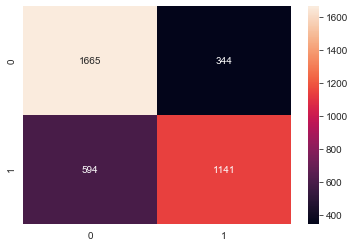

In [55]:
# Computing metrics
from sklearn.metrics import confusion_matrix, classification_report
sns.heatmap(confusion_matrix(y_test, predictions), annot=True, fmt='d')
plt.show()

In [56]:
print(classification_report(y_test, predictions))


             precision    recall  f1-score   support

          0       0.74      0.83      0.78      2009
          1       0.77      0.66      0.71      1735

avg / total       0.75      0.75      0.75      3744



In [57]:
import pandas as pd
import numpy as np

In [58]:
test=pd.read_csv('insu_test.csv')

In [59]:
test.head()

,ID,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age
0,17631,EPX,Travel Agency,Online,Cancellation Plan,192,HONG KONG,18.0,0.00,36
1,15064,EPX,Travel Agency,Online,1 way Comprehensive Plan,2,SINGAPORE,20.0,0.00,36
2,14139,C2B,Airlines,Online,Bronze Plan,13,SINGAPORE,13.5,3.38,24
3,19754,EPX,Travel Agency,Online,2 way Comprehensive Plan,133,"TAIWAN, PROVINCE OF CHINA",41.0,0.00,36
4,16439,C2B,Airlines,Online,Silver Plan,2,SINGAPORE,30.0,7.50,32


In [60]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22421 entries, 0 to 22420
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    22421 non-null  int64  
 1   Agency                22421 non-null  object 
 2   Agency Type           22421 non-null  object 
 3   Distribution Channel  22421 non-null  object 
 4   Product Name          22421 non-null  object 
 5   Duration              22421 non-null  int64  
 6   Destination           22421 non-null  object 
 7   Net Sales             22421 non-null  float64
 8   Commision (in value)  22421 non-null  float64
 9   Age                   22421 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 1.7+ MB


In [61]:
testcateg_col = ['Agency', 'Agency Type', 'Distribution Channel', 'Product Name', 'Destination']

In [62]:
for col in testcateg_col:
    uniq = len(df[col].unique())
    print(f'{col} :{uniq} Categories')

Agency :16 Categories
Agency Type :2 Categories
Distribution Channel :2 Categories
Product Name :25 Categories
Destination :97 Categories


In [63]:
Test_ID = test['ID']

In [64]:
test.drop('ID',1, inplace = True)

In [65]:
le = preprocessing.LabelEncoder()
df_test = test.apply(le.fit_transform)

In [66]:
df_test

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age
0,7,1,1,10,193,33,472,0,30
1,7,1,1,0,3,75,549,0,30
2,2,0,1,9,14,75,281,151,18
3,7,1,1,1,134,82,1513,0,30
4,2,0,1,17,3,75,1057,694,26
...,...,...,...,...,...,...,...,...,...
22416,6,1,1,16,11,1,67,1060,21
22417,7,1,1,1,33,84,1176,0,30
22418,7,1,1,1,6,84,549,0,30
22419,7,1,1,10,16,33,212,0,30


In [67]:
df_test = pd.get_dummies(df_test, columns=categorical_col).values

In [68]:
df_test.shape

(22421, 146)

In [69]:
test['Duration'] = np.where(test['Duration']<0,test['Duration'].mean(),test['Duration'] )

In [70]:
test.loc[test['Net Sales'] <= 0.0, 'Commision (in value)'] = 0

In [71]:
test['Net Sales'] = np.where(test['Net Sales'] <= 0.0,0.0,test['Net Sales'])

In [78]:
test_num_df = test.select_dtypes('number')

test_cat_df = test.select_dtypes('O')

In [73]:
# Replacing values with 0 and 1 for Agency and Distribution Channel

# test_cat_df.replace(to_replace=['Airlines','Travel Agency'],value=[1,0],inplace=True)
# test_cat_df.replace(to_replace=['Online','Offline'],value=[1,0],inplace=True)
# test_cat_df.head()

In [79]:
# # Applying One Hot encoding via get_dummies method for Destination, Agency, Product Name columns

test_dum_df = pd.get_dummies(test_cat_df,columns=['Destination','Agency','Product Name'],prefix=['Destination_Is','Agency_Is','Product Name_Is'],drop_first=True)
test_dum_df.head()

,Agency Type,Distribution Channel,Destination_Is_AUSTRALIA,Destination_Is_AUSTRIA,Destination_Is_AZERBAIJAN,Destination_Is_BAHRAIN,Destination_Is_BANGLADESH,Destination_Is_BELARUS,Destination_Is_BELGIUM,Destination_Is_BERMUDA,...,Product Name_Is_Premier Plan,Product Name_Is_Rental Vehicle Excess Insurance,Product Name_Is_Silver Plan,Product Name_Is_Single Trip Travel Protect Gold,Product Name_Is_Single Trip Travel Protect Platinum,Product Name_Is_Single Trip Travel Protect Silver,Product Name_Is_Spouse or Parents Comprehensive Plan,Product Name_Is_Ticket Protector,Product Name_Is_Travel Cruise Protect,Product Name_Is_Value Plan
0,Travel Agency,Online,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Travel Agency,Online,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Airlines,Online,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Travel Agency,Online,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Airlines,Online,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [80]:
test_new = pd.concat([test_num_df,test_dum_df],axis=1)
test_new.head()

,Duration,Net Sales,Commision (in value),Age,Agency Type,Distribution Channel,Destination_Is_AUSTRALIA,Destination_Is_AUSTRIA,Destination_Is_AZERBAIJAN,Destination_Is_BAHRAIN,...,Product Name_Is_Premier Plan,Product Name_Is_Rental Vehicle Excess Insurance,Product Name_Is_Silver Plan,Product Name_Is_Single Trip Travel Protect Gold,Product Name_Is_Single Trip Travel Protect Platinum,Product Name_Is_Single Trip Travel Protect Silver,Product Name_Is_Spouse or Parents Comprehensive Plan,Product Name_Is_Ticket Protector,Product Name_Is_Travel Cruise Protect,Product Name_Is_Value Plan
0,192.0,18.0,0.00,36,Travel Agency,Online,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2.0,20.0,0.00,36,Travel Agency,Online,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,13.0,13.5,3.38,24,Airlines,Online,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,133.0,41.0,0.00,36,Travel Agency,Online,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2.0,30.0,7.50,32,Airlines,Online,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [81]:
Final_Test = test_new.iloc[:].values

In [82]:
Final_Test

array([[192.0, 18.0, 0.0, ..., 0, 0, 0],
       [2.0, 20.0, 0.0, ..., 0, 0, 0],
       [13.0, 13.5, 3.38, ..., 0, 0, 0],
       ...,
       [5.0, 20.0, 0.0, ..., 0, 0, 0],
       [15.0, 10.0, 0.0, ..., 0, 0, 0],
       [25.0, 20.0, 0.0, ..., 0, 0, 0]], dtype=object)

In [83]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn import model_selection, preprocessing

In [84]:
test['Claim'] = model.predict(df_test)

In [85]:
test['Claim']

0        0
1        0
2        1
3        0
4        1
        ..
22416    1
22417    0
22418    0
22419    0
22420    0
Name: Claim, Length: 22421, dtype: int64

In [86]:
Submissions = pd.concat([Test_ID,test['Claim']],axis=1)

In [88]:
Submissions.head()

,ID,Claim
0,17631,0
1,15064,0
2,14139,1
3,19754,0
4,16439,1


In [89]:
Submissions.to_csv('Travel_Insurance_Claim_Prediction_Submission.csv',index=False)